## BEHACOM dataset exploration

### Imports

In [1]:
import pandas as pd
from time import time
import matplotlib.pyplot as plt

# Local file that contains a memory-optimized reader
from optimized_data_read import extract_dataframe

### Loading

In [2]:
data_path = 'data/'
user_id = 0
filename = data_path + 'User' + str(user_id) + '/User' + str(user_id) + '_BEHACOM.csv'

In [3]:
def print_elapsed_time(start):
    elapsed_time = time() - start
    print('Elapsed time: ' + '{0:0.2f}'.format(elapsed_time) + ' s')
    
def print_memory_usage(df):
    bytes_used = df.memory_usage(deep=True).sum()
    print('The dataframe uses ' + "{:,}".format(bytes_used) + ' bytes')

In [4]:
start = time()
df = pd.read_csv(filename, encoding='latin-1')
print_elapsed_time(start)
print_memory_usage(df)

Elapsed time: 12.21 s
The dataframe uses 584,809,296 bytes


"Normal" loading procedure

In [5]:
start = time()
df_low_memory = extract_dataframe(filename)
print_elapsed_time(start)
print_memory_usage(df_low_memory)

Elapsed time: 14.71 s
The dataframe uses 185,787,792 bytes


If we use the extract_dataframe function from the original helper file it's a bit slower but it encodes the data such that the memory is optimized.

In [6]:
df_low_memory['keystroke_counter'].describe()

count    6059.000000
mean       10.252682
std        27.168185
min      -128.000000
25%         0.000000
50%         0.000000
75%        14.000000
max       127.000000
Name: keystroke_counter, dtype: float64

It also suffers overflows during the reading process (in the previous cell the minimum number of keystrokes should not be negative). Therefore I'll avoid loading data like that.

In [7]:
df['keystroke_counter'].describe()

count    6059.000000
mean       15.618584
std        32.186342
min         0.000000
25%         0.000000
50%         1.000000
75%        17.000000
max       261.000000
Name: keystroke_counter, dtype: float64

"Normal" loading does not suffer from the same problem

### Exploration

![title](features.png)

In [8]:
df

,timestamp,keystroke_counter,erase_keys_counter,erase_keys_percentage,press_press_average_interval,press_press_stddev_interval,press_release_average_interval,press_release_stddev_interval,word_counter,word_average_length,...,current_app_stddev_cpu,system_average_cpu,system_stddev_cpu,current_app_average_mem,current_app_stddev_mem,system_average_mem,system_stddev_mem,received_bytes,sent_bytes,USER
0,1.574257e+12,14,2,0.14,200.69,165.47,107.00,36.45,2,5.00,...,0.00,13.03,14.42,11.07,0.00,1.15,2.57,1618568.0,274869.0,0
1,1.574258e+12,37,3,0.08,825.69,1842.59,132.68,96.69,2,10.50,...,7.91,17.50,6.45,1.44,0.08,12.71,0.97,14835273.0,449913.0,0
2,1.574258e+12,24,0,0.00,2399.87,5181.55,122.22,28.14,3,5.00,...,13.58,19.73,4.89,11.66,0.56,16.50,6.15,5097547.0,272460.0,0
3,1.574258e+12,28,0,0.00,2087.78,4272.74,308.11,272.18,1,3.00,...,6.00,13.60,3.18,12.55,1.31,25.07,2.55,3926179.0,293861.0,0
4,1.574258e+12,71,6,0.08,421.29,1260.38,153.82,138.59,5,11.20,...,7.20,16.09,8.56,12.89,1.32,25.72,2.54,2106149.0,241120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054,1.578766e+12,8,0,0.00,580.43,851.32,87.38,28.61,1,4.00,...,7.67,5.21,2.45,17.50,0.28,18.98,0.28,1447400.0,234625.0,0
6055,1.578766e+12,32,3,0.09,1441.19,6028.06,146.71,140.72,6,3.50,...,4.27,6.42,3.39,16.47,0.32,17.96,0.32,29698808.0,526419.0,0
6056,1.578766e+12,12,0,0.00,214.82,191.39,116.75,30.17,2,4.50,...,12.03,7.65,1.78,15.55,0.93,17.04,0.93,31654926.0,1139532.0,0
6057,1.578766e+12,65,0,0.00,208.12,682.38,117.16,26.79,13,4.08,...,7.21,5.46,2.45,16.59,1.04,18.08,1.04,4487052.0,313436.0,0


First we'll look at all the columns of the dataframe (they are explained in https://www.sciencedirect.com/science/article/pii/S2352340920306612?via%3Dihub)

In [9]:
for i, col in enumerate(df.columns):
    print(str(i) + ' - ' + col)

0 - timestamp
1 - keystroke_counter
2 - erase_keys_counter
3 - erase_keys_percentage
4 - press_press_average_interval
5 - press_press_stddev_interval
6 - press_release_average_interval
7 - press_release_stddev_interval
8 - word_counter
9 - word_average_length
10 - word_stddev_length
11 - word_length_1
12 - word_length_2
13 - word_length_3
14 - word_length_4
15 - word_length_5
16 - word_length_6
17 - word_length_7
18 - word_length_8
19 - word_length_9
20 - word_length_10
21 - word_length_11
22 - keystrokes_key_0
23 - keystrokes_key_1
24 - keystrokes_key_2
25 - keystrokes_key_3
26 - keystrokes_key_4
27 - keystrokes_key_5
28 - keystrokes_key_6
29 - keystrokes_key_7
30 - keystrokes_key_8
31 - keystrokes_key_9
32 - keystrokes_key_a
33 - keystrokes_key_b
34 - keystrokes_key_c
35 - keystrokes_key_d
36 - keystrokes_key_e
37 - keystrokes_key_f
38 - keystrokes_key_g
39 - keystrokes_key_h
40 - keystrokes_key_i
41 - keystrokes_key_j
42 - keystrokes_key_k
43 - keystrokes_key_l
44 - keystrokes_key_m

2138 - digraph_counter_orightshift
2139 - digraph_counter_obackspace
2140 - digraph_counter_oalt
2141 - digraph_counter_oleft
2142 - digraph_counter_oright
2143 - digraph_counter_oup
2144 - digraph_counter_odown
2145 - digraph_counter_orightarrow
2146 - digraph_counter_oleftarrow
2147 - digraph_counter_ouparrow
2148 - digraph_counter_odownarrow
2149 - digraph_counter_o+
2150 - digraph_counter_p0
2151 - digraph_counter_p1
2152 - digraph_counter_p2
2153 - digraph_counter_p3
2154 - digraph_counter_p4
2155 - digraph_counter_p5
2156 - digraph_counter_p6
2157 - digraph_counter_p8
2158 - digraph_counter_p9
2159 - digraph_counter_pa
2160 - digraph_counter_pb
2161 - digraph_counter_pc
2162 - digraph_counter_pd
2163 - digraph_counter_pe
2164 - digraph_counter_pf
2165 - digraph_counter_pg
2166 - digraph_counter_ph
2167 - digraph_counter_pi
2168 - digraph_counter_pj
2169 - digraph_counter_pk
2170 - digraph_counter_pl
2171 - digraph_counter_pm
2172 - digraph_counter_pn
2173 - digraph_counter_pñ
217

4927 - digraph_counter_><
4928 - digraph_counter_>>
4929 - digraph_counter_>space
4930 - digraph_counter_>inter
4931 - digraph_counter_>rightshift
4932 - digraph_counter_>backspace
4933 - digraph_counter_>left
4934 - digraph_counter_space0
4935 - digraph_counter_space1
4936 - digraph_counter_space2
4937 - digraph_counter_space3
4938 - digraph_counter_space4
4939 - digraph_counter_space5
4940 - digraph_counter_space6
4941 - digraph_counter_space7
4942 - digraph_counter_space8
4943 - digraph_counter_space9
4944 - digraph_counter_spacea
4945 - digraph_counter_spaceb
4946 - digraph_counter_spacec
4947 - digraph_counter_spaced
4948 - digraph_counter_spacee
4949 - digraph_counter_spacef
4950 - digraph_counter_spaceg
4951 - digraph_counter_spaceh
4952 - digraph_counter_spacei
4953 - digraph_counter_spacej
4954 - digraph_counter_spacek
4955 - digraph_counter_spacel
4956 - digraph_counter_spacem
4957 - digraph_counter_spacen
4958 - digraph_counter_spaceñ
4959 - digraph_counter_spaceo
4960 - dig

6070 - digraph_counter_+p
6071 - digraph_counter_+r
6072 - digraph_counter_+s
6073 - digraph_counter_+t
6074 - digraph_counter_+v
6075 - digraph_counter_+w
6076 - digraph_counter_+x
6077 - digraph_counter_+y
6078 - digraph_counter_+z
6079 - digraph_counter_+´
6080 - digraph_counter_+"
6081 - digraph_counter_+ç
6082 - digraph_counter_+/
6083 - digraph_counter_+(
6084 - digraph_counter_+)
6085 - digraph_counter_+=
6086 - digraph_counter_+shift
6087 - digraph_counter_+capslock
6088 - digraph_counter_+tab
6089 - digraph_counter_+esc
6090 - digraph_counter_+f2
6091 - digraph_counter_+f5
6092 - digraph_counter_+ind
6093 - digraph_counter_+pageup
6094 - digraph_counter_+pagedown
6095 - digraph_counter_+numlock
6096 - digraph_counter_+-
6097 - digraph_counter_+.
6098 - digraph_counter_+[
6099 - digraph_counter_+space
6100 - digraph_counter_+inter
6101 - digraph_counter_+rightctrl
6102 - digraph_counter_+rightshift
6103 - digraph_counter_+backspace
6104 - digraph_counter_+left
6105 - digraph_co

10165 - digraph_average_time_homen
10166 - digraph_average_time_homeñ
10167 - digraph_average_time_homeo
10168 - digraph_average_time_homep
10169 - digraph_average_time_homer
10170 - digraph_average_time_homes
10171 - digraph_average_time_homet
10172 - digraph_average_time_homeu
10173 - digraph_average_time_homev
10174 - digraph_average_time_homew
10175 - digraph_average_time_homex
10176 - digraph_average_time_homey
10177 - digraph_average_time_homez
10178 - digraph_average_time_home"
10179 - digraph_average_time_homeº
10180 - digraph_average_time_home$
10181 - digraph_average_time_home/
10182 - digraph_average_time_home(
10183 - digraph_average_time_home)
10184 - digraph_average_time_homeshift
10185 - digraph_average_time_homecapslock
10186 - digraph_average_time_hometab
10187 - digraph_average_time_homeª
10188 - digraph_average_time_home\
10189 - digraph_average_time_homeesc
10190 - digraph_average_time_homef1
10191 - digraph_average_time_homef2
10192 - digraph_average_time_homef3
10

11426 - digraph_average_time_right8
11427 - digraph_average_time_right9
11428 - digraph_average_time_righta
11429 - digraph_average_time_rightb
11430 - digraph_average_time_rightc
11431 - digraph_average_time_rightd
11432 - digraph_average_time_righte
11433 - digraph_average_time_rightf
11434 - digraph_average_time_rightg
11435 - digraph_average_time_righth
11436 - digraph_average_time_righti
11437 - digraph_average_time_rightj
11438 - digraph_average_time_rightk
11439 - digraph_average_time_rightl
11440 - digraph_average_time_rightm
11441 - digraph_average_time_rightn
11442 - digraph_average_time_rightñ
11443 - digraph_average_time_righto
11444 - digraph_average_time_rightp
11445 - digraph_average_time_rightq
11446 - digraph_average_time_rightr
11447 - digraph_average_time_rights
11448 - digraph_average_time_rightt
11449 - digraph_average_time_rightu
11450 - digraph_average_time_rightv
11451 - digraph_average_time_rightw
11452 - digraph_average_time_rightx
11453 - digraph_average_time

As we can see, most of the features are related to digraphs (because of the huge number of arrangements of them). If we remove them, we get a much smaller number of columns.

In [10]:
i = 0
for col in df.columns:
    if 'digraph' not in col:
        print(str(i) + ' - ' + col)
        i += 1

0 - timestamp
1 - keystroke_counter
2 - erase_keys_counter
3 - erase_keys_percentage
4 - press_press_average_interval
5 - press_press_stddev_interval
6 - press_release_average_interval
7 - press_release_stddev_interval
8 - word_counter
9 - word_average_length
10 - word_stddev_length
11 - word_length_1
12 - word_length_2
13 - word_length_3
14 - word_length_4
15 - word_length_5
16 - word_length_6
17 - word_length_7
18 - word_length_8
19 - word_length_9
20 - word_length_10
21 - word_length_11
22 - keystrokes_key_0
23 - keystrokes_key_1
24 - keystrokes_key_2
25 - keystrokes_key_3
26 - keystrokes_key_4
27 - keystrokes_key_5
28 - keystrokes_key_6
29 - keystrokes_key_7
30 - keystrokes_key_8
31 - keystrokes_key_9
32 - keystrokes_key_a
33 - keystrokes_key_b
34 - keystrokes_key_c
35 - keystrokes_key_d
36 - keystrokes_key_e
37 - keystrokes_key_f
38 - keystrokes_key_g
39 - keystrokes_key_h
40 - keystrokes_key_i
41 - keystrokes_key_j
42 - keystrokes_key_k
43 - keystrokes_key_l
44 - keystrokes_key_m

As we can see in the next cell, the USER column is always exactly the user id from which we loaded the data.

In [11]:
df[df['USER'] != 0]

,timestamp,keystroke_counter,erase_keys_counter,erase_keys_percentage,press_press_average_interval,press_press_stddev_interval,press_release_average_interval,press_release_stddev_interval,word_counter,word_average_length,...,current_app_stddev_cpu,system_average_cpu,system_stddev_cpu,current_app_average_mem,current_app_stddev_mem,system_average_mem,system_stddev_mem,received_bytes,sent_bytes,USER


Because of how the data was loaded, we have many different data types:

In [12]:
for dtype in df.dtypes.unique().tolist():
    print(dtype)

float64
int64
object


The 'object' data type seems to refer to strings. In the following we can also see that some rows have no penultimate_app. Since this data is categorical there is no problem with that for deep learning.

In [13]:
df.select_dtypes(object)

,current_app,penultimate_app
0,chrome.exe,codeblocks.exe
1,explorer.exe,ApplicationFrameHost.exe
2,chrome.exe,explorer.exe
3,chrome.exe,-
4,chrome.exe,-
...,...,...
6054,chrome.exe,-
6055,chrome.exe,-
6056,chrome.exe,-
6057,chrome.exe,-


In [14]:
df.isna().sum().sum()

0

Apart from that it does not seem that we have any missing value, which is good!

Let's now check that there is no outlier in the ordinal fields. For that we exclude the timestamps (which are always huge) and on the non-string columns we check the min and max values.

In [15]:
df_ordinal = df.select_dtypes([int, float])

In [16]:
max_values = df_ordinal.max()
max_values[max_values > 1e+05]

timestamp                                   1.578766e+12
click_speed_average_0                       1.577913e+12
click_speed_stddev_0                        1.116158e+12
mouse_average_movement_speed                2.980500e+05
mouse_average_movement_speed_direction_1    2.980500e+05
received_bytes                              3.891192e+08
sent_bytes                                  3.840078e+07
dtype: float64

The click speed average and click speed stddev values seem really huge compared to what we would expect of them, so we need to keep an eye on that.

<AxesSubplot:xlabel='Datapoint', ylabel='Value of feature'>

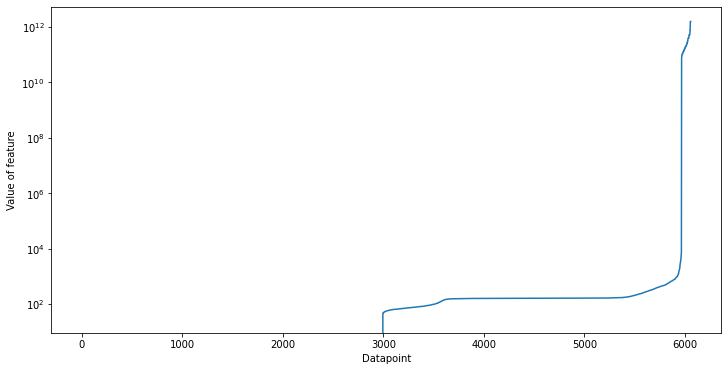

In [17]:
df['click_speed_average_0'].sort_values().reset_index(drop=True).plot(figsize=(12,6), logy=True, ylabel='Value of feature', xlabel='Datapoint')

<AxesSubplot:xlabel='Datapoint', ylabel='Value of feature'>

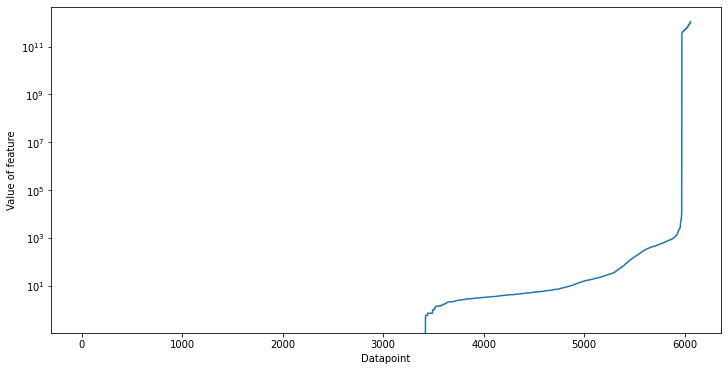

In [18]:
df['click_speed_stddev_0'].sort_values().reset_index(drop=True).plot(figsize=(12,6), logy=True, ylabel='Value of feature', xlabel='Datapoint')

As we can see on the plots (note the **log y axis**), the distribution is really weird and some values could even be considered as outliers.

In [19]:
df_ordinal.min().min()

0.0

There's no negative value in the dataframe.

**In conclusion we have both ordinal and categorical features. In order to use deep learning we thus need a model that is able to handle both (for example using Embedding layers on categorical features). We found possible outliers (click speed), and we did not check for more subtle outliers (given the number of columns it's a bit hard to do), so we'll need to keep that in mind.**